In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.paths import LOCAL_PROCESSED_DATA_PATH, LOCAL_RAW_DATA_PATH
from src.processing.dialogre_processing import DialogREDatasetTransformer
from src.processing.dataframe_utils import get_counts_and_percentages
from src.utils import handle_exceptions
import itertools
from tqdm import tqdm
import pandas as pd

tqdm.pandas()

dt = DialogREDatasetTransformer(LOCAL_RAW_DATA_PATH / 'dialog-re')
df = dt.load_data_to_dataframe()
df


,Dialogue,Relations,Origin
0,"[Speaker 1: Hey!, Speaker 2: Hey., Speaker 3: ...","[{'y': 'casting director', 'x': 'Ann', 'rid': ...",dev
1,"[Speaker 1, Speaker 2: Hi, Speaker 3: Hi! Hey ...","[{'y': 'Speaker 2', 'x': 'Speaker 1', 'rid': [...",dev
2,"[Speaker 1, Speaker 2: Hi!, Speaker 3: Hey!, S...","[{'y': 'man', 'x': 'Speaker 4', 'rid': [37], '...",dev
3,[Speaker 1: Wow! It looks like we got a lot of...,"[{'y': 'baby', 'x': 'Speaker 2', 'rid': [37], ...",dev
4,"[Speaker 1: Now, Mom, everything's going fine,...","[{'y': '26', 'x': 'Speaker 1', 'rid': [25], 'r...",dev
...,...,...,...
1783,"[Speaker 1: Nice camoflauge man, for a minute ...","[{'y': 'Speaker 1', 'x': 'Speaker 2', 'rid': [...",train
1784,"[Speaker 1: Well, I'm sure you'll teach her a ...","[{'y': 'Sir', 'x': 'Speaker 1', 'rid': [37], '...",train
1785,[Speaker 1: You know what? I can't even worry ...,"[{'y': 'baby', 'x': 'Speaker 1', 'rid': [37], ...",train
1786,"[Speaker 1: And cut. Hey, Butt Guy, what the h...","[{'y': 'Butt Guy', 'x': 'Speaker 2', 'rid': [3...",train


In [26]:
mask = df.Dialogue.apply(len) <= 10
df[mask].shape

(742, 3)

In [43]:
df

,Dialogue,Relations,Origin
0,"[Speaker 1: Hey!, Speaker 2: Hey., Speaker 3: ...","[{'y': 'casting director', 'x': 'Ann', 'rid': ...",dev
1,"[Speaker 1, Speaker 2: Hi, Speaker 3: Hi! Hey ...","[{'y': 'Speaker 2', 'x': 'Speaker 1', 'rid': [...",dev
2,"[Speaker 1, Speaker 2: Hi!, Speaker 3: Hey!, S...","[{'y': 'man', 'x': 'Speaker 4', 'rid': [37], '...",dev
3,[Speaker 1: Wow! It looks like we got a lot of...,"[{'y': 'baby', 'x': 'Speaker 2', 'rid': [37], ...",dev
4,"[Speaker 1: Now, Mom, everything's going fine,...","[{'y': '26', 'x': 'Speaker 1', 'rid': [25], 'r...",dev
...,...,...,...
1783,"[Speaker 1: Nice camoflauge man, for a minute ...","[{'y': 'Speaker 1', 'x': 'Speaker 2', 'rid': [...",train
1784,"[Speaker 1: Well, I'm sure you'll teach her a ...","[{'y': 'Sir', 'x': 'Speaker 1', 'rid': [37], '...",train
1785,[Speaker 1: You know what? I can't even worry ...,"[{'y': 'baby', 'x': 'Speaker 1', 'rid': [37], ...",train
1786,"[Speaker 1: And cut. Hey, Butt Guy, what the h...","[{'y': 'Butt Guy', 'x': 'Speaker 2', 'rid': [3...",train


In [44]:
focus_relations = {"acquaintance", "children", "other_family", "parents", "siblings", "spouse", "place_of_residence", "visited_place", "pet", "residents_of_place", "visitors_of_place"}

tmp = df.explode('Relations')
mask = tmp.Relations.apply(lambda x: x['r'][0].split(':')[-1] in focus_relations)
tmp2 = tmp[mask].reset_index().groupby('index').Relations.apply(lambda x: list(x))
tmp2

index
1       [{'y': 'Speaker 2', 'x': 'Speaker 1', 'rid': [...
2       [{'y': 'Speaker 3', 'x': 'Emma', 'rid': [13], ...
3       [{'y': 'Speaker 3', 'x': 'Speaker 2', 'rid': [...
4       [{'y': 'Ross', 'x': 'Speaker 1', 'rid': [16], ...
8       [{'y': 'Mitzi', 'x': 'Speaker 1', 'rid': [31],...
                              ...                        
1775    [{'y': 'Speaker 3', 'x': 'Barbara', 'rid': [17...
1779    [{'y': 'Speaker 1', 'x': 'Prague', 'rid': [32]...
1781    [{'y': 'Nancy', 'x': 'Speaker 1', 'rid': [17],...
1783    [{'y': 'Speaker 1', 'x': 'Speaker 2', 'rid': [...
1787    [{'y': 'Speaker 2', 'x': 'Speaker 1', 'rid': [...
Name: Relations, Length: 583, dtype: object

In [52]:
focus_df = pd.merge(df[['Dialogue', 'Origin']], tmp2,how='inner', left_index=True, right_index=True)
focus_df

,Dialogue,Origin,Relations
1,"[Speaker 1, Speaker 2: Hi, Speaker 3: Hi! Hey ...",dev,"[{'y': 'Speaker 2', 'x': 'Speaker 1', 'rid': [..."
2,"[Speaker 1, Speaker 2: Hi!, Speaker 3: Hey!, S...",dev,"[{'y': 'Speaker 3', 'x': 'Emma', 'rid': [13], ..."
3,[Speaker 1: Wow! It looks like we got a lot of...,dev,"[{'y': 'Speaker 3', 'x': 'Speaker 2', 'rid': [..."
4,"[Speaker 1: Now, Mom, everything's going fine,...",dev,"[{'y': 'Ross', 'x': 'Speaker 1', 'rid': [16], ..."
8,"[Speaker 1: Here Mitzi! Here Mitzi!, Speaker 2...",dev,"[{'y': 'Mitzi', 'x': 'Speaker 1', 'rid': [31],..."
...,...,...,...
1775,"[Speaker 1: It's James Bond., Speaker 2: Sorry...",train,"[{'y': 'Speaker 3', 'x': 'Barbara', 'rid': [17..."
1779,"[Speaker 1: So, did you pick one yet?, Speaker...",train,"[{'y': 'Speaker 1', 'x': 'Prague', 'rid': [32]..."
1781,"[Speaker 1: I'm just saying, I have a cabin in...",train,"[{'y': 'Nancy', 'x': 'Speaker 1', 'rid': [17],..."
1783,"[Speaker 1: Nice camoflauge man, for a minute ...",train,"[{'y': 'Speaker 1', 'x': 'Speaker 2', 'rid': [..."


<Axes: ylabel='Frequency'>

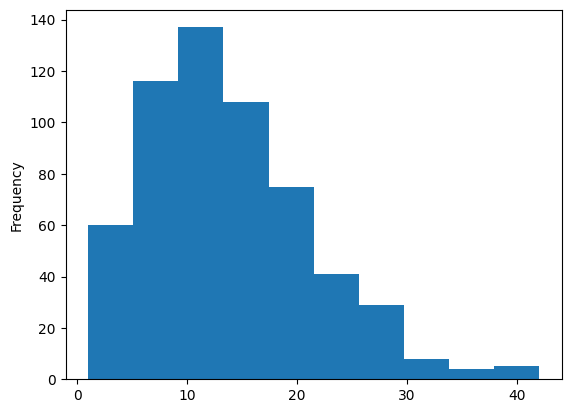

In [53]:
focus_df.Dialogue.apply(len).plot(kind='hist')